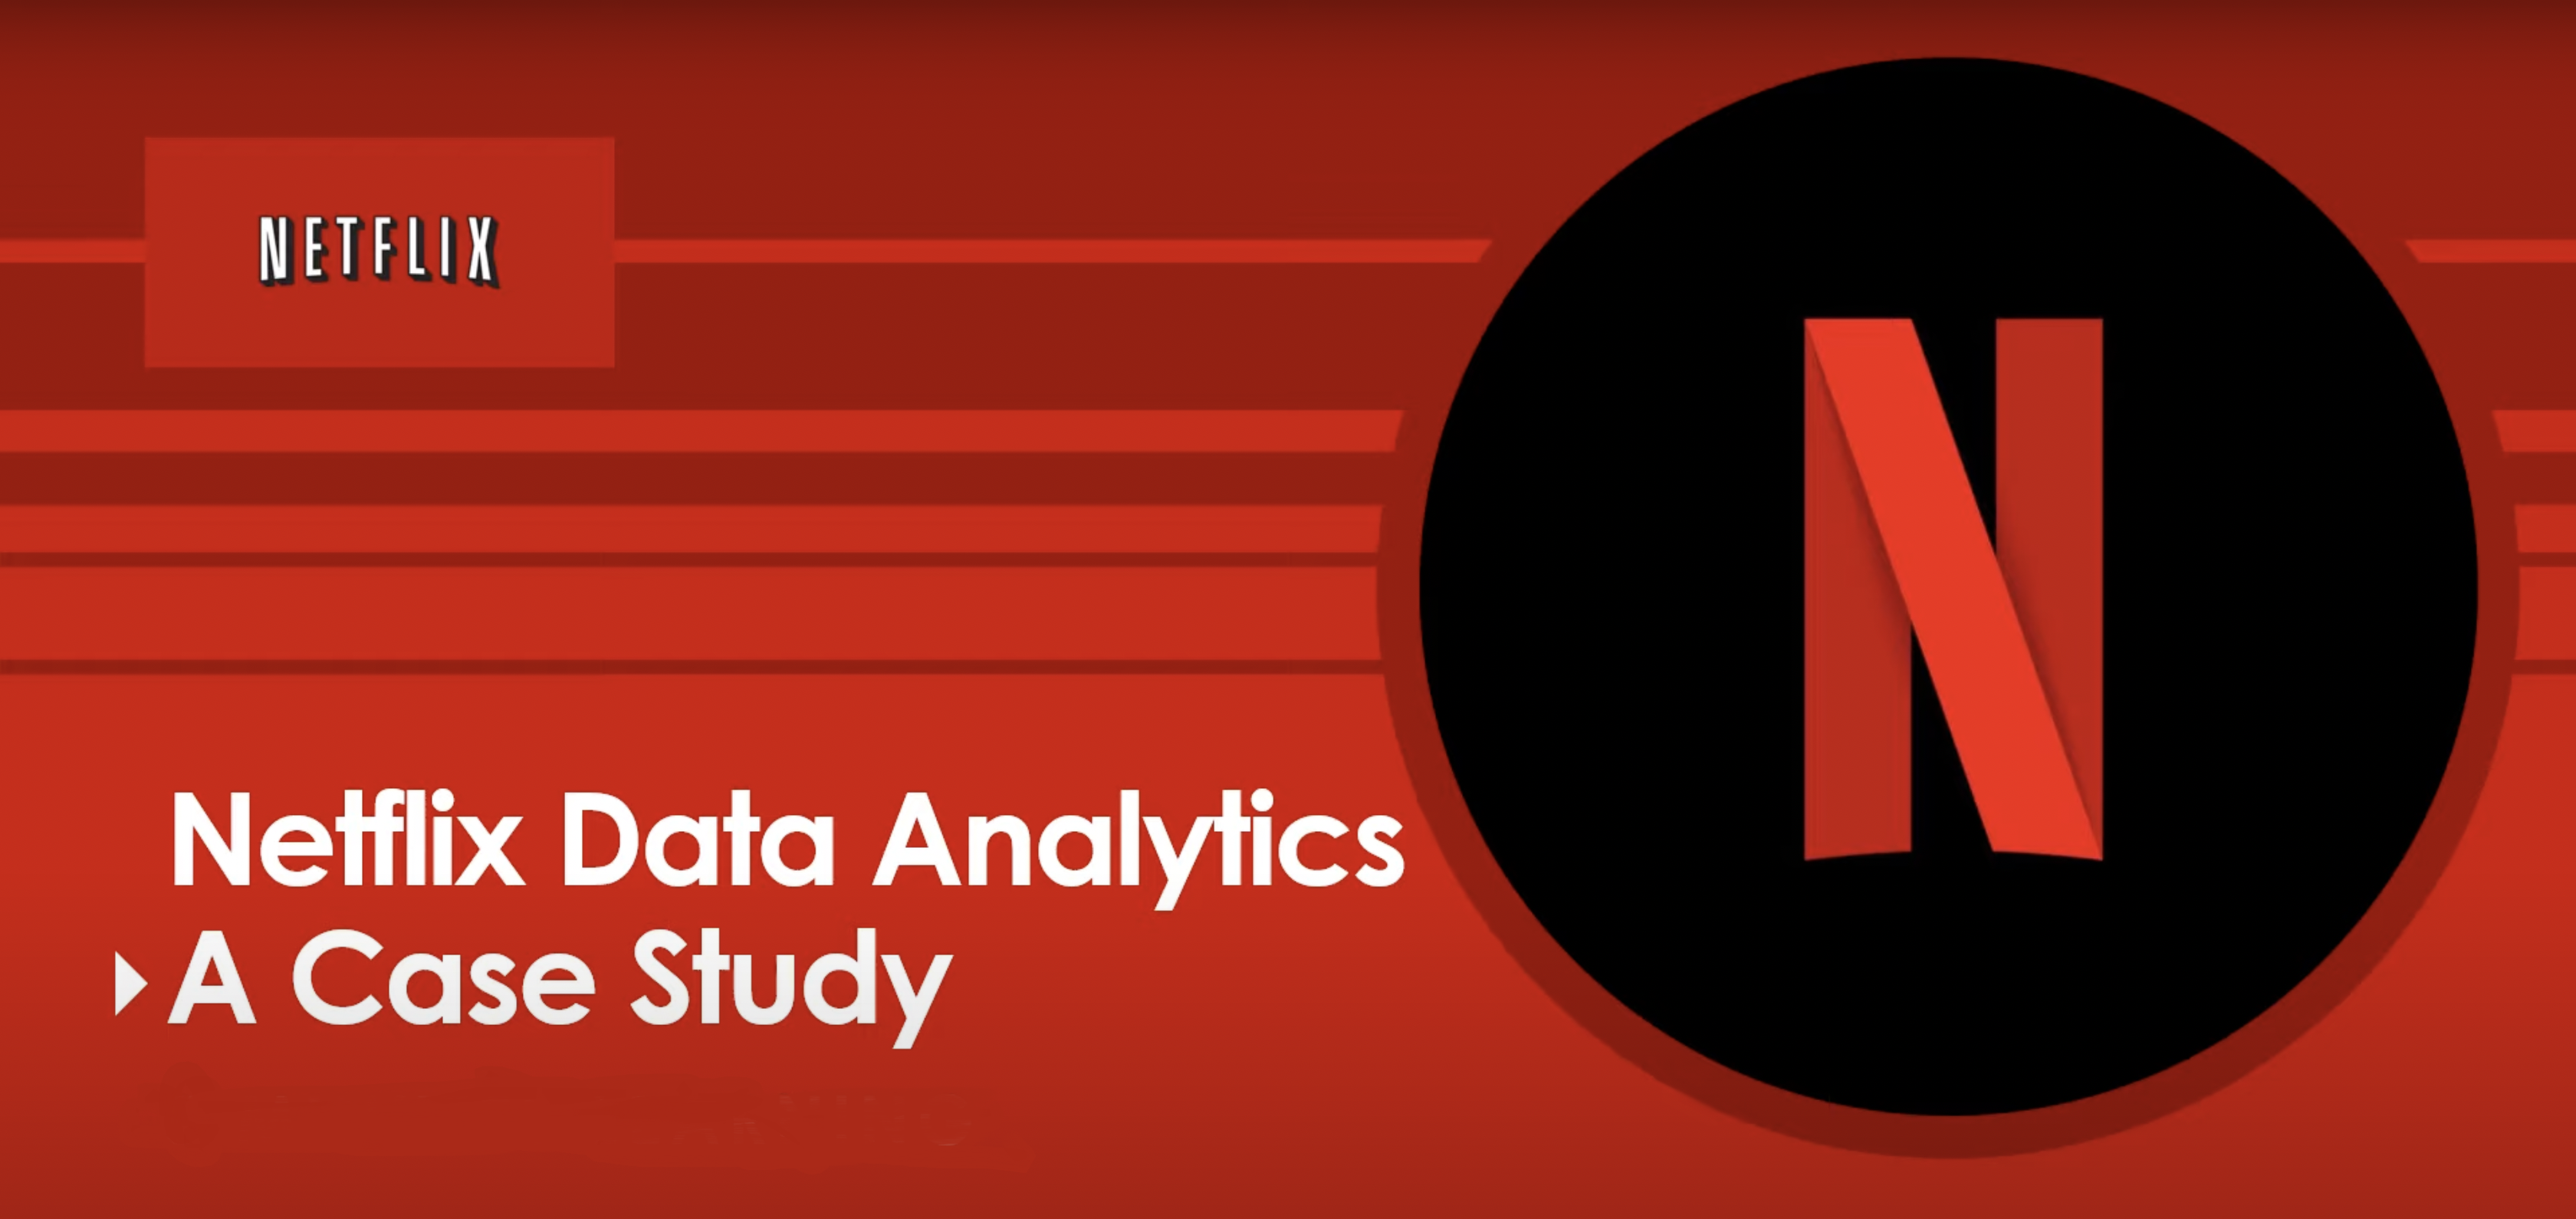

In [1]:
from PIL import Image
img = Image.open("netflix.png")
img

# A. Exploratory Data Analysis on Netflix
## Demonstrate by:
* **Biswarup Das** 
* **Jokin Prabhu**

## 1. Data Description
* **show_id     :** It denotes the unique key for every show listed in Netflix.
* **type        :** There is only two type of video content available in Netfilx, i.e. Movie and TV Shows
* **title       :** Title is the name of the show/movie.
* **director    :** Name of the director(s) who is responsible for production of such specific content(s).
* **cast        :** People who acted in such content are given in this column.
* **country     :** Country column is given here as some content are contry specific, we can see which content plays in which country.
* **date_added  :** This column shows us on which date a content come online in Netflix for the first time.
* **release_year:** Content publishing year on TV or box-office for the first time.
* **rating      :** Internal rating from Netflix.
* **duration    :** Watch time of the Netflix content.
* **listed_in   :** This ia genre, the type of the content, like Documentaries, TV shows, TV Dramas, etc.
* **description :** A short description about the content.

**Getting the Data** 

In [2]:
import pandas as pd
import numpy as np
netflix = pd.read_csv('netflix_titles.csv')
pd.set_option('display.max_columns',None) # display all the features 
netflix.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## 2. Analysing the Data
Data Information

In [3]:
print(netflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


* Dataset contains object and intiger type data where 10 features are in object type and 1 in int64 type.

In [4]:
netflix.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

## Checking Duplicates Values

In [5]:
print(netflix.duplicated().value_counts())
netflix.drop_duplicates(inplace = True)
print(len(netflix))

False    8807
dtype: int64
8807


## Checking Missing Values

In [6]:
print('Data columns with null values:\n',
     netflix.isnull().sum())

Data columns with null values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


* We can see that there are many null values present in feature: director, cast, country, rating, duration

## Checking Unique Values

In [7]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

* From the above output we can have an overall idea of how many unique values present in the dataset. Now Explore each and every features to see those unique values

In [8]:
print('type:\n',list(netflix['type'].unique()))
print('*'*70)
print('\ntitle:\n',list(netflix['title'].unique()))
print('*'*70)
print('\ndirector:\n',list(netflix['director'].unique()))
print('*'*70)
print('\ncast:\n',list(netflix['cast'].unique()))
print('*'*70)
print('\ncountry:\n',list(netflix['country'].unique()))
print('*'*70)
print('\ndate_added:\n',list(netflix['date_added'].unique()))
print('*'*70)
print('\nrelease_year:\n',list(netflix['release_year'].unique()))
print('*'*70)
print('\nrating:\n',list(netflix['rating'].unique()))
print('*'*70)
print('\nduration:\n',list(netflix['duration'].unique()))
print('*'*70)
print('\nlisted_in:\n',list(netflix['listed_in'].unique()))
print('*'*70)
print('\ndescription:\n',list(netflix['description'].unique()))
print('*'*70)

type:
 ['Movie', 'TV Show']
**********************************************************************

title:
 ['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Drago

## 3. Data Filteration & Modification

## Dropping unnessesary column(s)

* show_id feature is irrelevant to our analysis so let's remove this feature

In [9]:
netflix=netflix.drop(['show_id'],axis=1)

## Handling Null Values

* As we have seen already that in some features the null values are very few so we can remove those rows directly, it will hadrly effect our overall analysis. Below are the features that we are removing:

* 1. date_added
* 2. rating
* 3. duration

* We have already seen that in another three columns, there is a huge chunk on missing values. By dropping those rows from tha dataset will negetively effect our further analysis, so instead of removing those null values we are going to replace them with the keyword "unknown". Below are the features that we are going to replace values:

* 1. director
* 2. cast
* 3. country

In [10]:
netflix.dropna(subset=['date_added'],how='any',inplace=True) # droping null value rows of "date_added" column
netflix.dropna(subset=['rating'],how='any',inplace=True)     # droping null value rows of "rating" column
netflix.dropna(subset=['duration'],how='any',inplace=True)   # droping null value rows of "duration" column


netflix['director'].replace(np.nan,'unknown',inplace=True)   # replacing NaN value with "unknown"
netflix['cast'].replace(np.nan,'unknown',inplace=True)       # replacing NaN value with "unknown"
netflix['country'].replace(np.nan,'unknown',inplace=True)    # replacing NaN value with "unknown"

## Now let's check again if any null values are present or not.

In [11]:
print('Data columns with null values:\n',
     netflix.isnull().sum())

Data columns with null values:
 type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


* So now the data is looking quite good, let's sharpen our data a little bit

## Removing white space

In [12]:
netflix_white_spacefree = netflix.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

* After executing the above code we just cleared white spaces before and after of every object data present in the current dataset

## Case correction

In [13]:
netflix_lower = netflix_white_spacefree.apply(lambda x: x.astype(str).str.lower())
netflix_lower.head(5)

type                  title         director  \
0    movie   dick johnson is dead  kirsten johnson   
1  tv show          blood & water          unknown   
2  tv show              ganglands  julien leclercq   
3  tv show  jailbirds new orleans          unknown   
4  tv show           kota factory          unknown   

                                                cast        country  \
0                                            unknown  united states   
1  ama qamata, khosi ngema, gail mabalane, thaban...   south africa   
2  sami bouajila, tracy gotoas, samuel jouy, nabi...        unknown   
3                                            unknown        unknown   
4  mayur more, jitendra kumar, ranjan raj, alam k...          india   

           date_added release_year rating   duration  \
0  september 25, 2021         2020  pg-13     90 min   
1  september 24, 2021         2021  tv-ma  2 seasons   
2  september 24, 2021         2021  tv-ma   1 season   
3  september 24, 2021         2021  tv-ma   1 season   
4  september 24, 2021         2021  tv-ma  2 seasons   

                                           listed_in  \
0                                      documentaries   
1    international tv shows, tv dramas, tv mysteries   
2  crime tv shows, international tv shows, tv act...   
3                             docuseries, reality tv   
4  international tv shows, romantic tv shows, tv ...   

                                         description  
0  as her father nears the end of his life, filmm...  
1  after crossing paths at a party, a cape town t...  
2  to protect his family from a powerful drug lor...  
3  feuds, flirtations and toilet talk go down amo...  
4  in a city of coaching centers known to train i...

* Now all the string type datas present in the dataset are now in small letters.

## Drop Duplicates

In [14]:
netflix_lower.drop_duplicates(subset ="title",keep = False, inplace = True)
netflix_purified = netflix_lower.copy()

* After executing the above code all duplicate values are removed

## Feature Specific Data Modification: duration

* In one season there can be 2 episodes or it can be 12 episodes, in average we are taking 6 episodes in one season.
* NETFLIX data says each episodes have 30 minutes(approx) of content, so 6 x 30=180 minutes in average.
* Therefore, in duration column, if 2 or more seasons are there then it will be 180 x 2=360 or 180 x no.of seasons = 180n minutes, if 1 seasons is there then it will be 180 x 1=180 minutes, also if there is 19 seasons then 180 x 19=3420 munites.

In [15]:
netflix_purified['duration'] = netflix_purified['duration'].str.replace(' min','', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('1 season','130', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('2 seasons','360', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('3 seasons','540', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('4 seasons','420', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('5 seasons','900', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('6 seasons','1080', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('7 seasons','1260', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('8 seasons','1440', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('9 seasons','1620', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('10 seasons','1800', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('11 seasons','1980', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('12 seasons','2160', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('13 seasons','2340', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('14 seasons','2520', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('15 seasons','2700', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('16 seasons','2880', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('17 seasons','3060', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('18 seasons','3240', regex=True).str.strip()
netflix_purified['duration'] = netflix_purified['duration'].str.replace('19 seasons','3420', regex=True).str.strip()

In [16]:
netflix_purified.head(5)

type                  title         director  \
0    movie   dick johnson is dead  kirsten johnson   
1  tv show          blood & water          unknown   
2  tv show              ganglands  julien leclercq   
3  tv show  jailbirds new orleans          unknown   
4  tv show           kota factory          unknown   

                                                cast        country  \
0                                            unknown  united states   
1  ama qamata, khosi ngema, gail mabalane, thaban...   south africa   
2  sami bouajila, tracy gotoas, samuel jouy, nabi...        unknown   
3                                            unknown        unknown   
4  mayur more, jitendra kumar, ranjan raj, alam k...          india   

           date_added release_year rating duration  \
0  september 25, 2021         2020  pg-13       90   
1  september 24, 2021         2021  tv-ma      360   
2  september 24, 2021         2021  tv-ma      130   
3  september 24, 2021         2021  tv-ma      130   
4  september 24, 2021         2021  tv-ma      360   

                                           listed_in  \
0                                      documentaries   
1    international tv shows, tv dramas, tv mysteries   
2  crime tv shows, international tv shows, tv act...   
3                             docuseries, reality tv   
4  international tv shows, romantic tv shows, tv ...   

                                         description  
0  as her father nears the end of his life, filmm...  
1  after crossing paths at a party, a cape town t...  
2  to protect his family from a powerful drug lor...  
3  feuds, flirtations and toilet talk go down amo...  
4  in a city of coaching centers known to train i...

* Here in the dataset we can see that all the unorganised features including duration are now in proper manner and also ready for our futher analysis

In [17]:
netflix_purified['release_year']=netflix_purified['release_year'].astype(int)

In [18]:
print(netflix_purified.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8778 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8778 non-null   object
 1   title         8778 non-null   object
 2   director      8778 non-null   object
 3   cast          8778 non-null   object
 4   country       8778 non-null   object
 5   date_added    8778 non-null   object
 6   release_year  8778 non-null   int64 
 7   rating        8778 non-null   object
 8   duration      8778 non-null   object
 9   listed_in     8778 non-null   object
 10  description   8778 non-null   object
dtypes: int64(1), object(10)
memory usage: 822.9+ KB
None


## 4. Exporting the Purified Data

In [19]:
netflix_purified.to_csv('netfilx_cleaned.csv')

* After execution of the above codes now we just make a fresh copy of .csv file with purified data.

# C. Sentiment Analysis on Netflix
## Demonstrate by:
* **Biswarup Das** 

**Slight modification in some datas, keeping the nan values**

In [20]:
netflix_purified['director'].replace('unknown',np.nan,inplace=True)   # keeping the NaN values, replace later
netflix_purified['cast'].replace('unknown',np.nan,inplace=True)       # keeping the NaN values, replace later
netflix_purified['country'].replace('unknown',np.nan,inplace=True)    # keeping the NaN values, replace later

In [21]:
print('Data columns with null values:\n',
     netflix_purified.isnull().sum())

Data columns with null values:
 type               0
title              0
director        2617
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [22]:
import numpy as np
import pandas as pd
import plotly.express as px # for data visualization

## Content Distribution:
**To begin the task of analyzing Netflix data, I’ll start by looking at the distribution of content ratings on Netflix:**

In [23]:
content = netflix_purified.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(content, values='counts', names='rating',
title='Distribution of Content Ratings on Netflix')
pieChart.show()
print(content)

      rating  counts
0          g      41
1      nc-17       3
2         nr      78
3         pg     287
4      pg-13     490
5          r     799
6      tv-14    2155
7       tv-g     220
8      tv-ma    3197
9      tv-pg     860
10      tv-y     306
11     tv-y7     333
12  tv-y7-fv       6
13        ur       3


**The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.**

## Top 5 Countries:
**Now let’s see the top 5 countries using Netflix:**

In [24]:
filtered_c=pd.DataFrame()
filtered_c=netflix_purified['country'].str.split(',',expand=True).stack()
filtered_c=filtered_c.to_frame()
filtered_c.columns=['Country']
c=filtered_c.groupby(['Country']).size().reset_index(name='Total Content')
#c=c[c.Country !='No Country Specified']
c=c.sort_values(by=['Total Content'],ascending=False)
cTop5=c.head()
cTop5=cTop5.sort_values(by=['Total Content'])
fig5=px.bar(cTop5,x='Total Content',y='Country',title='Top 5 Countries on Netflix')
fig5.show()


**From the above graph it is derived that the top 5 countries on this platform are:**
* **USA**
* **India**
* **UK**
* **USA**
* **Canada**

## Top 5 Actors and Directors:
**Now let’s see the top 5 successful directors on this platform:**

In [25]:
netflix_purified['director']=netflix_purified['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=netflix_purified['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

**From the above graph it is derived that the top 5 directors on this platform are:**
* **Rajiv Chilaka**
* **Raul Campos**
* **Jan Suter**
* **Marcus Raboy**
* **Suhas Kadav**

**Now let's see the top 5 successful Actors on this platform:**

In [26]:
netflix_purified['cast']=netflix_purified['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=netflix_purified['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor',title='Top 5 Actors on Netflix')
fig2.show()

**From the above graph it is derived that the top 5 actors on this platform are:**
* **Anupam Kher**
* **Rupa Bhimani**
* **Takahiro Sakurai**
* **Julie tejwani**
* **Om Puri**

## Analyzing Content on Netflix:
**The next thing to analyze from this data is the trend of production over the years on Netflix:**

In [27]:
df1=netflix_purified[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
print(df2)
fig3=px.bar(df2,x='Release Year',y='Total Content',title='Top 5 Actors on Netflix')
fig3.show()

     Release Year     type  Total Content
95           2010    movie            151
96           2010  tv show             39
97           2011    movie            145
98           2011  tv show             40
99           2012    movie            173
100          2012  tv show             63
101          2013    movie            225
102          2013  tv show             61
103          2014    movie            262
104          2014  tv show             88
105          2015    movie            396
106          2015  tv show            159
107          2016    movie            658
108          2016  tv show            243
109          2017    movie            763
110          2017  tv show            265
111          2018    movie            767
112          2018  tv show            377
113          2019    movie            633
114          2019  tv show            397
115          2020    movie            517
116          2020  tv show            436
117          2021    movie        

**The above line graph shows that from 2011 content addition on Netflix started growing and touches its peak on year 2018 and after that there is a huge fall, it shows that Netfix slow down their process of content addition.**

## Key Focus of Netflix

In [28]:
df1=netflix_purified[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig4 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig4.show()

**The above line graph shows that there has been a decline in the production of the content for movies since 2018 but for TV shows it gradually increases till 2020 and then there is a sharp decline after 2020.It shows Netfilx has more focus on TV shows. At last, to conclude our analysis, I will analyze the sentiment of content on Netflix:**

## About TextBlob?
* **TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks.**
* **A good thing about TextBlob is that they are just like python strings. So, you can transform and play with it same like we did in python. Below, I have shown you below some basic tasks. Don’t worry about the syntax, it is just to give you an intuition about how much-related TextBlob is to Python strings.**

In [32]:
! pip install textblob # This command may not work properly on iOS

In [ ]:
from textblob import TextBlob # for sentiment analysis, This command may not work properly on iOS

# Sentiment Analysis
* **Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.**
* **The sentiment function of textblob returns two properties, polarity, and subjectivity.**
* **Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].**
* **Let’s check the sentiment of our blob.**

In [31]:
# This set of code may not work properly on iOS
dfx=netflix_purified[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index],'Sentiment']=sent

dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

**So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.**